<div  style="text-align:center;">
<h1>Heart Failure Prediction</h1>
<img src="image/DALLE_H.png" alt="Made by DALL-E">
</div>

<div  style="text-align:center;">
<h2>DESCRIZIONE DEL PROGETTO</h2>
</div>

<p>Le malattie cardiovascolari (CVD) sono la prima causa di morte a livello globale, con circa 17,9 milioni di vite all'anno, pari al 31% di tutti i decessi nel mondo. Quattro decessi su 5 per CVD sono dovuti ad attacchi cardiaci e ictus, e un terzo di questi decessi avviene prematuramente in persone di età inferiore ai 70 anni. L'insufficienza cardiaca è un evento comune causato da CVD, per questo abbiamo deciso di sviluppare un progetto di machine learning per prevedere una possibile malattia cardiaca basata su parametri comunemente osservati durante gli screening diagnostici. Per fare ciò abbiamo preso in analisi un dataset, creato combinando diversi set di dati già resi disponibili da alcuni centri ospedalieri. Il dataset finale in analisi sarà composto da 11 features:
</p>

<p>Età: età del paziente [anni].</p>
<p>Sesso: sesso del paziente [M: maschio, F: femmina].</p>
<p>ChestPainType: tipo di dolore toracico [TA: Angina tipica, ATA: Angina atipica, NAP: Dolore non anginoso, ASY: Asintomatico].</p>
<p>RestingBP: pressione sanguigna a riposo [mm Hg].</p>
<p>Colesterolo: colesterolo sierico [mm/dl].</p>
<p>FastingBS: glicemia a digiuno [1: se FastingBS > 120 mg/dl, 0: altrimenti].</p>
<p>RestingECG: risultati dell'elettrocardiogramma a riposo [Normal: Normale, ST: presenta anomalie dell'onda ST-T (inversioni dell'onda T e/o elevazione o depressione del tratto ST > 0,05 mV), LVH: mostra una probabile o definita ipertrofia ventricolare sinistra secondo i criteri di Estes].</p>
<p>MaxHR: frequenza cardiaca massima raggiunta [valore numerico compreso tra 60 e 202].</p>
<p>ExerciseAngina: angina indotta dall'esercizio [Y: Sì, N: No].</p>
<p>Oldpeak: oldpeak = ST [Valore numerico misurato in depressione].</p>
<p>ST_Slope: pendenza del segmento ST di picco da sforzo [Up: in salita, Flat: in piano, Down: in discesa].</p>
<p>HeartDisease: [1: malattia cardiaca, 0: nomale].</p>
Link al dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


<p>Il nostro progetto sarà scritto in linguaggio Python utilizzando sia Pytorch che Scikitlearn. Prevede l’utilizzo di 5 modelli di classificazione binaria (Neural Network, Logistic Regression, Support Vector Machines, K-Nearest Neighbors, Random Forest). Per ognuno di essi avverrà una valutazione tramite diverse metriche (accuracy, precision, recall, f1-score, macro avg e weighted avg) e verrà creata e visualizzata una matrice di confusione. L’andamento dei nostri modelli verrà confrontato graficamente, ed infine avverrà un test su nuovi dati.
</p>

<div  style="text-align:center;">
<h2>Analisi dei dati</h2>
</div>

Prima di procedere oltre con la trasformazione dei dati e creazione del modello è necessario analizzare il dataset per individuare eventuali criticità e scegliere correttamente i tipi di modelli idonei

In [1]:
#Importiamo le librerie necessarie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

ModuleNotFoundError: No module named 'pandas'

In [42]:
#Lettura e visualizzazione del dataframe (df)
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [43]:
#Descrizione statistica del dataframe
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Media del colesterolo: 244


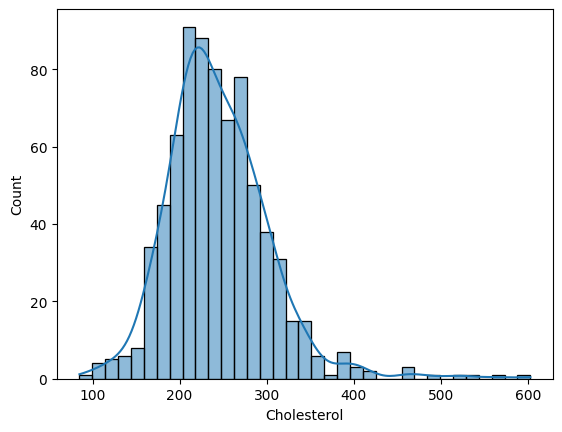

Media del colesterolo per casi sani: 238


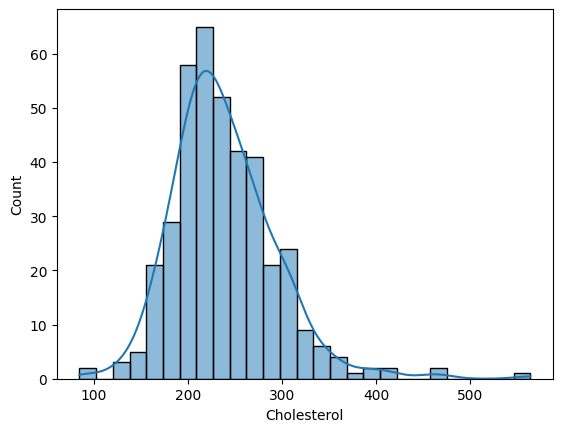

Media del colesterolo per casi malati: 251


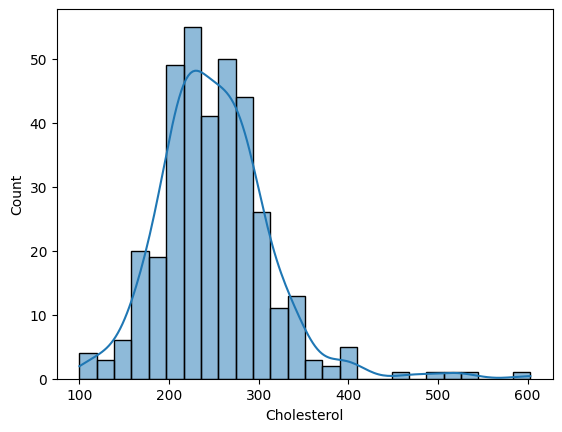

In [44]:
#Dato che le osservazioni del colesterolo contengono valori pari a 0, ovvero valori nulli, 
#valutiamo prima che le osservazioni seguano una densità normale; 
#e dopo assegnamo al posto di 0 il valore medio per i sani ed i malati

#Colesterolo totale per sani e malati
valori_non_zero = df[df['Cholesterol'] != 0]['Cholesterol']
sns.histplot(valori_non_zero, kde=True)
media_colesterolo = int(valori_non_zero.mean())
print(f"Media del colesterolo: {media_colesterolo}")
plt.show()

#Colesterolo dei sani
df_sano = df[df['HeartDisease'] == 0]
valori_non_zero = df_sano[df_sano['Cholesterol'] != 0]['Cholesterol']
sns.histplot(valori_non_zero, kde=True)
media_colesterolo_sani = int(valori_non_zero.mean())
print(f"Media del colesterolo per casi sani: {media_colesterolo_sani}")
plt.show()

#Colesterolo dei malati
df_malato = df[df['HeartDisease'] == 1]
valori_non_zero = df_malato[df_malato['Cholesterol'] != 0]['Cholesterol']
sns.histplot(valori_non_zero, kde=True)
media_colesterolo_malati = int(valori_non_zero.mean())
print(f"Media del colesterolo per casi malati: {media_colesterolo_malati}")
plt.show()

In [45]:
#Cambio i valori zero con le medie per malati e sani
df.loc[df['HeartDisease'] == 1, 'Cholesterol'] = df.loc[df['HeartDisease'] == 1, 'Cholesterol'].replace(0, media_colesterolo_malati)
df.loc[df['HeartDisease'] == 0, 'Cholesterol'] = df.loc[df['HeartDisease'] == 0, 'Cholesterol'].replace(0, media_colesterolo_sani)


In [46]:
#Dato che la descrizione del dataset ci dice che in RestingBP abbiamo come valore minimo 0
#andiamo a cercare in quale indice è contenuto
for index, value in df['RestingBP'].items():
    if value == 0:
        print(f"Zero BP found at index {index}")

Zero BP found at index 449


Media dei valori: 132


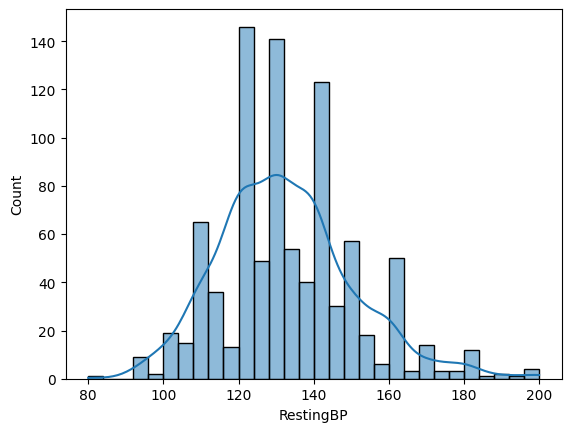

Media del restingbp per casi sani: 130


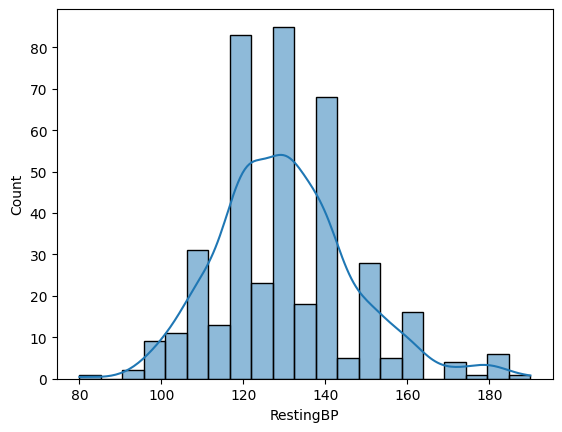

Media del restingbp per casi malati: 134


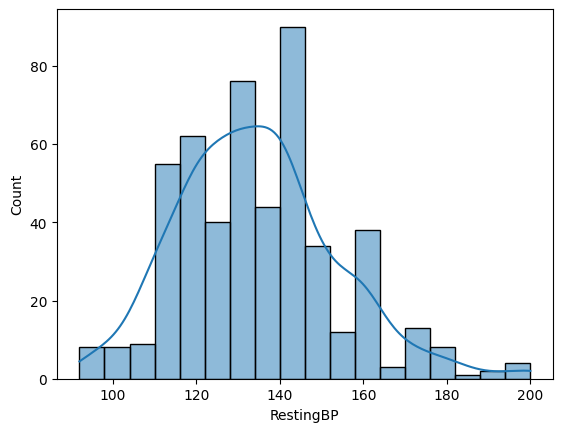

In [47]:
#Abbiamo trovato un valore nullo(zero) in RestingBP quindi lo cambiamo assegnando il valore medio per i sani ed i malati

#RestingBP per sani e malati
valori_non_zero = df[df['RestingBP'] != 0]['RestingBP']
sns.histplot(valori_non_zero, kde=True)
media_restingbp = int(valori_non_zero.mean())
print(f"Media dei valori: {media_restingbp}")
plt.show()

#RestingBP dei sani
df_sano = df[df['HeartDisease'] == 0]
valori_non_zero = df_sano[df_sano['RestingBP'] != 0]['RestingBP']
sns.histplot(valori_non_zero, kde=True)
media_restingbp_sani = int(valori_non_zero.mean())
print(f"Media del restingbp per casi sani: {media_restingbp_sani}")
plt.show()

#RestingBP dei malati
df_malato = df[df['HeartDisease'] == 1]
valori_non_zero = df_malato[df_malato['RestingBP'] != 0]['RestingBP']
sns.histplot(valori_non_zero, kde=True)
media_restingbp_malati = int(valori_non_zero.mean())
print(f"Media del restingbp per casi malati: {media_restingbp_malati}")
plt.show()


In [48]:
#Cambio i valori zero con le medie per malati e sani
df.loc[df['HeartDisease'] == 1, 'RestingBP'] = df.loc[df['HeartDisease'] == 1, 'RestingBP'].replace(0, media_restingbp_malati)
df.loc[df['HeartDisease'] == 0, 'RestingBP'] = df.loc[df['HeartDisease'] == 0, 'RestingBP'].replace(0, media_restingbp_sani)


In [49]:
#Descrizione dei dati dopo la correzzione dei valori nulli
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.542484,245.544662,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989996,53.382201,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,250.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


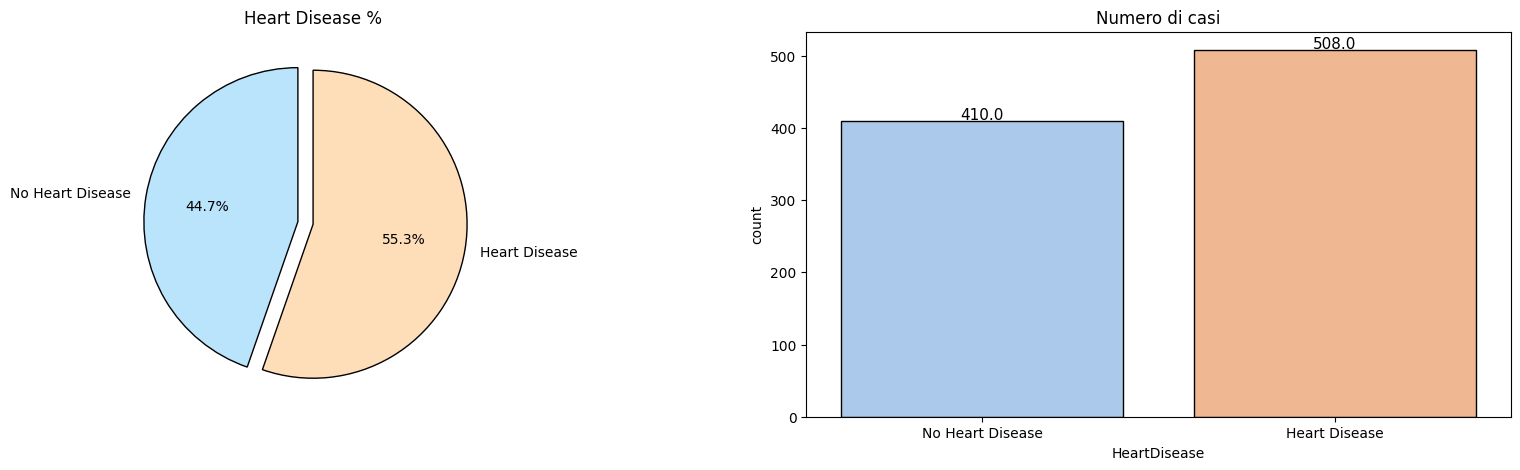

In [50]:
#visualizziamo graficamete il nostro target (HeartDisease):
l = list(df['HeartDisease'].value_counts()) #creo una lista con il conteggio dei valori presi una sola volta in 'HeartDisease'
val = [l[1] / sum(l) * 100,l[0] / sum(l) * 100] #calcolo la percentuale per ogni valore

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
colors = ['#BAE3FC','#FEDDB9']
# creiamo un iagramma a torta per la percentuale di malati e sani
plt.subplot(1,2,1)
plt.pie(val,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2) #creiamo un countplot per effettuare il conteggio dei malati e dei sani
ax = sns.countplot(x = 'HeartDisease', data = df, palette = 'pastel', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Numero di casi');
plt.show()

Il numero di sani e di malati nel nostro dataframe è accettabile

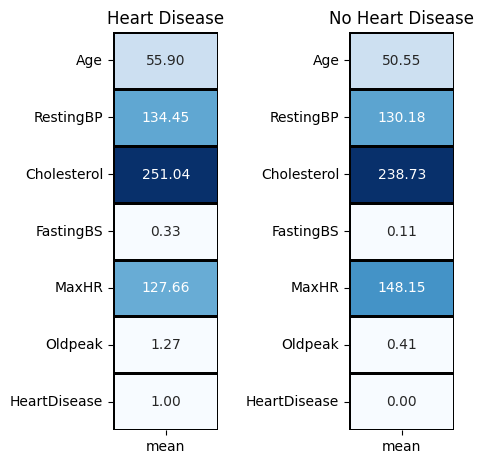

In [51]:
#Costruiamo un Heatmap per rappresentare le medie delle nostre variabili numeriche in relazione ad HeartDisease

yes = df[df['HeartDisease'] == 1].describe().T #Filtra le righe del Dataset in cui 'HeartDisease' è uguale a 1 e calcola le statistiche descrittive
no = df[df['HeartDisease'] == 0].describe().T #Filtra le righe del Dataset in cui 'HeartDisease' è uguale a 0 e calcola le statistiche descrittive
colors = ['#BAE3FC','#FEDDB9']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1) #Heatmap per le statistiche descrittive delle variabili quando 'HeartDisease' è 1
sns.heatmap(yes[['mean']],annot = True,cmap = "Blues",linewidths = 0.8,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2) #Heatmap per le statistiche descrittive delle variabili quando 'HeartDisease' è 0
sns.heatmap(no[['mean']],annot = True,cmap = "Blues",linewidths = 0.8,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

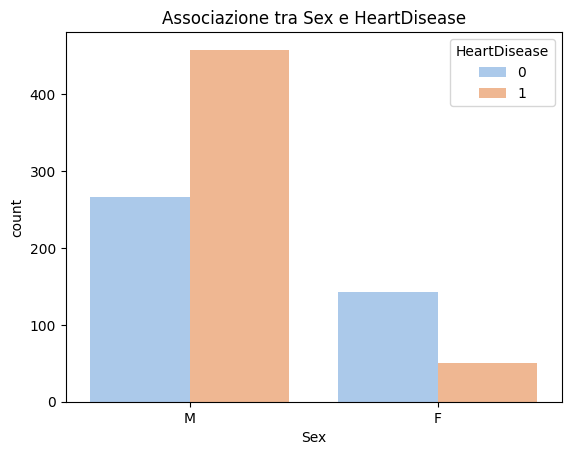

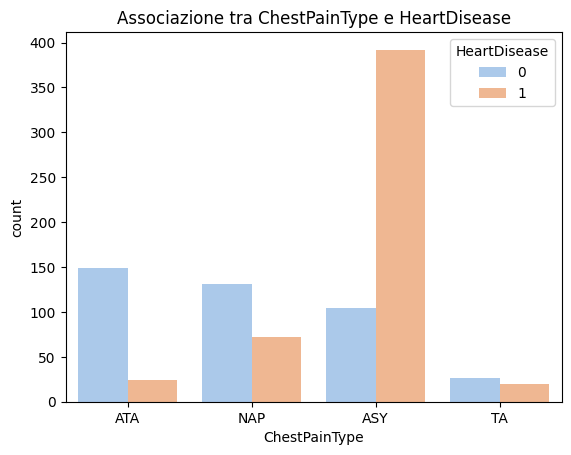

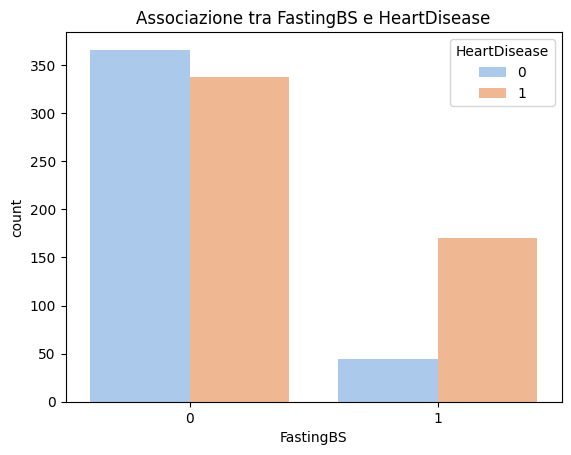

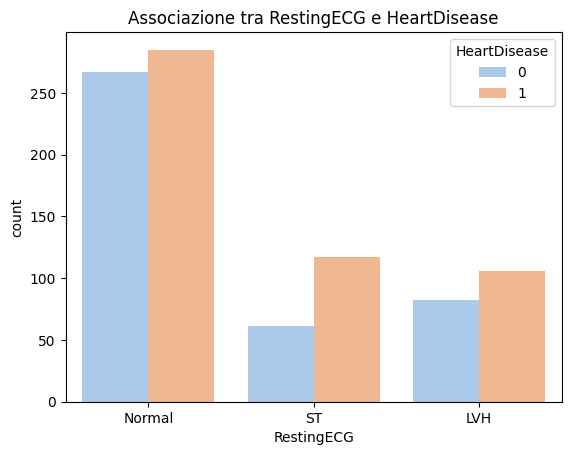

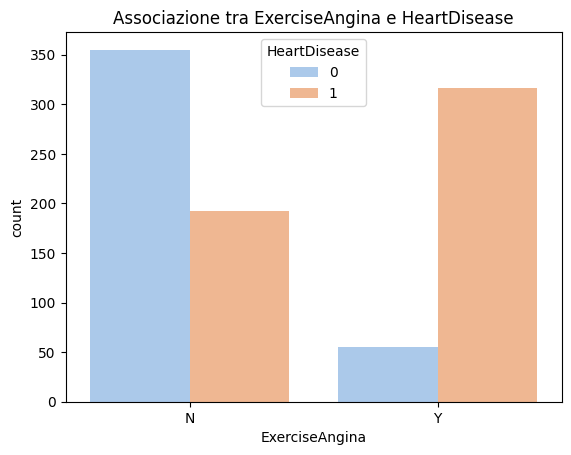

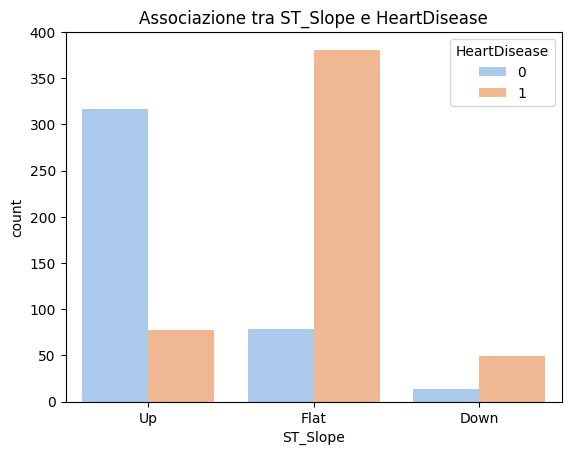

In [52]:
# Creazione di un set di grafici per le features categoriche rispetto a 'HeartDisease'
features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
            'ExerciseAngina', 'ST_Slope']
for feature in features:
    sns.countplot(x=feature, hue='HeartDisease', data=df, palette='pastel')
    plt.title(f'Associazione tra {feature} e HeartDisease')
    plt.show()


<h2>SCELTE PROGETTUALI</h2>
Dalla nostra anailisi dei dati abbiamo riscontarto che il Dataset non riscontrà a pieno la realtà, a causa di:

<p>-Valori di colesterolo pari a 0</p>
<p>-Un valore di pressione sanguigna a riposo pari a 0</p>
<p>-Correlazione errate tra tipo di dolore toracico e malattia cardiaca (es. elevato numero di malati asintomatici al dolore, rispetto a chi ha dolore di tipo anginoso)</p>
<p>-Correlazione errate tra Elettrocardiogramma a riposo e malattia cardiaca (es. elevato numero di malati con ecg normale)</p>

<p>Nonostante ciò, abbiamo scelto di sviluppare il nostro progetto basandoci sull'analisi statistica fatta.  </p>

<div  style="text-align:center;">
<h2>Trasformazione dei dati</h2>
</div>

In [53]:
#Creazione della matrice delle feature e array dei target
X = df.drop('HeartDisease', axis=1) #rimuovo il target dal dataset, che ora si chiamerà X
y = df['HeartDisease'] #isolo il target, che si chiamerà y

In [54]:
#Avendo delle features di tipo stringa c'è bisogno di convertirle in variabili numeriche, effettuando un One Hot dei dati, tramite get_dummies()
#crea una colonna binaria separata per ciascuna categoria.
#Ogni colonna rappresenta una categoria unica, e il valore nella colonna è 1 se l'istanza appartiene a quella categoria e 0 altrimenti.

one_hot_encoded_sex = pd.get_dummies(X['Sex'], prefix='Sex')
one_hot_encoded_ChestPainType = pd.get_dummies(X['ChestPainType'], prefix='ChestPainType')
one_hot_encoded_RestingECG = pd.get_dummies(X['RestingECG'], prefix='RestingECG')
one_hot_encoded_ExerciseAngina = pd.get_dummies(X['ExerciseAngina'], prefix='ExerciseAngina')
one_hot_encoded_ST_Slope = pd.get_dummies(X['ST_Slope'], prefix='ST_Slope')

# Aggiungo le colonne one-hot encodate al dataset
X = pd.concat([X, one_hot_encoded_sex, one_hot_encoded_ChestPainType, one_hot_encoded_RestingECG, one_hot_encoded_ExerciseAngina, one_hot_encoded_ST_Slope], axis=1)

# Rimuovo le colonne originali categoriche
X = X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)


In [55]:
"""
#Avendo delle features di tipo stringa c'è bisogno di convertirle in variabili numeriche
#utilizzeremo LabelEncoder
#Label Encoding assegna un intero unico a ciascuna categoria

label_encoder = LabelEncoder()
X['Sex_encoded'] = label_encoder.fit_transform(X['Sex'])
X['ChestPainType_encoded'] = label_encoder.fit_transform(X['ChestPainType'])
X['RestingECG_encoded'] = label_encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina_encoded'] = label_encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope_encoded'] = label_encoder.fit_transform(X['ST_Slope'])

# Rimuovo le colonne originali
X = X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)
"""

"\n#Avendo delle features di tipo stringa c'è bisogno di convertirle in variabili numeriche\n#utilizzeremo LabelEncoder\n#Label Encoding assegna un intero unico a ciascuna categoria\n\nlabel_encoder = LabelEncoder()\nX['Sex_encoded'] = label_encoder.fit_transform(X['Sex'])\nX['ChestPainType_encoded'] = label_encoder.fit_transform(X['ChestPainType'])\nX['RestingECG_encoded'] = label_encoder.fit_transform(X['RestingECG'])\nX['ExerciseAngina_encoded'] = label_encoder.fit_transform(X['ExerciseAngina'])\nX['ST_Slope_encoded'] = label_encoder.fit_transform(X['ST_Slope'])\n\n# Rimuovo le colonne originali\nX = X.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)\n"

In [56]:
X #X sarà il nostro nuovo dataset in analisi

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [57]:
#descrizione del dataset dopo le modifiche
X.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.542484,245.544662,0.233115,136.809368,0.887364,0.210240,0.789760,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,17.989996,53.382201,0.423046,25.460334,1.066570,0.407701,0.407701,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,250.000000,0.000000,138.000000,0.600000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [59]:
#splitto il dataset in training e test set, usiamo random_state per rendere riproducibile l'esperimento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
#standadizziamo le features
#La standardizzazione consiste nel trasformare le features in modo che abbiano una media zero e una deviazione standard unitaria
#z = X-media delle features/deviazione standard delle features
scaler = StandardScaler()

In [61]:
#calcoliamo la media e la devizione standard, quindi trasformo le features del training set:
X_train_transform = scaler.fit_transform(X_train)

In [62]:
#X_train_transform

In [63]:
#utilizzo media e deviazione standard calcolate sul traing set per trasformare le featurest del test set:
X_test_transform = scaler.transform(X_test)

In [64]:
#X_test_transform

In [65]:
#y_train e y_test sono oggetti di tipo series e non possono essere convertiti in tensori. Per fare ciò c'è bisogno di convertirli prima in Numpy array
y_train_np = np.array(y_train, dtype=np.float32) 
y_test_np = np.array(y_test, dtype=np.float32)

In [66]:
#trasformo i dati in tensori:
X_train_tensor = torch.tensor(X_train_transform, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_transform, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32)

In [67]:
#Creiamo dei tensori per le features e per i target, come sottoclassi del dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [68]:
batch_size = 64 #definiamo un batch di 64 cioè ogni elemento del dataloader restituirà un batch di 64 features e targets
#DataLoader aiuta a caricare e iterare gli elementi di un dataset durante la fase di addestramento
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)#shuffle=True indica che il set di addestramento verrà mescolato in modo casuale durante ogni epoca di addestramento
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

<div  style="text-align:center;">
<h2>Costruzione del modello di Rete Neurale</h2>
</div>

<p>La rete neurale utilizzata è un modello feedforward semplice composta da uno strato di input, uno strato nascosto e uno strato di output. La dimensione dello strato di input è determinata dalle features del dataset, e la dimensione dello strato di output è 1. 
</p>
Il primo strato della rete prevede una trasformazione lineare del df: 
<img style="text-align:center;" src="image/linear.png" alt="Made by DALL-E">
L'output generato da questa trasformazione lineare va incontro ad funzione RELU, questa funzione restituisce 0 se l'input è negativo e l'input stesso se positivo (introducendo non linearità nella rete):
<img style="text-align:center;" src="image/relu.png" alt="Made by DALL-E">
L'output generato dalla funzione RELU diventa input per il secondo strato della rete, che subisce una trasformazione lineare del tipo:
<img style="text-align:center;" src="image/linear.png" alt="Made by DALL-E">
L'output di questa trasformazione lineare andrà incontro ad una funzione Sigmoid, che mappa i valori a un intervallo compreso tra 0 e 1:
<img style="text-align:center;" src="image/Sigmoid.png" alt="Made by DALL-E">



In [69]:
#definiamo la rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size): #definiamo gli strati della rete, input_size indica la dimensione delle features
        super(NeuralNetwork, self).__init__() #fa riferimaneto, in una sottoclasse, alla classe "madre", restituisce un oggetto temporaneo della superclasse che consente l'accesso a tutti i suoi metodi alla classe figlia
        self.fc1 = nn.Linear(input_size, 64) #Fc1: primo strato della rete (fully connected), 64 indica i nodi del layer. In questo layer vengono appresi anche i pesi associati alle features
        self.relu = nn.ReLU() #Funzione di attivazione Relu. Introduce non-linearità nella rete, consentendo di apprendere pattern più complessi.
        self.fc2 = nn.Linear(64, 1) #secondo strato della rete (fully connected)
        #64 indica la dimensione del layer(64 nodi), 1 indica che l'output sarà di una sigula unità
        self.sigmoid = nn.Sigmoid() #funzione di attivazione sigomide


    def forward(self, x): #definisce come l'input dovrebbe essere trasformato quando passa attraverso la rete neurale
        x = self.fc1(x) #passiamo i dati attravesro il primo strato
        x = self.relu(x) #applichiamo la funzione relu
        x = self.fc2(x) #passiamo i dati attraverso il secondo strato
        x = self.sigmoid(x) #applichiamo la funzione di attivazione sigomide (poichè classificazione binaria)
        return x #Restituiamo l'output della rete. In questo caso, un singolo valore tra 0 e 1

In [70]:
#Iniziallizzazione del modello
model_nn = NeuralNetwork(input_size=X_train_tensor.shape[1]) #con .shape[1] prendiamo solo le colonne(features)

In [71]:
#Definisco la funzione di perdita
criterion = nn.BCELoss() #Binary Cross Entropy Loss

<p>BCELoss sta per Binary Cross Entropy ed è la funzione di perdita. Valuta quanto le previsioni del modello si discostano dalla verità, penalizzando maggiormente le previsioni errate. Si basa sulla formula:
</p>

<img style="text-align:center;" src="image/BCEloss.png" alt="Made by DALL-E">

<p>N = numero totale di elementi del dataset</p>
<p>y = valore vero</p>
<p>ŷ = previsione del modello</p>


In [72]:
#definisco un ottimizzatore
optimizer = optim.SGD(model_nn.parameters(), lr=0.001) #Algoritmo della discesa del gradiente stocastico, impostando il passo a 0.001

SGD è l'algoritmo della discesa del gradiente stocastico, utilizzato per ottimizzare la fase di addestramento del modello. Durante ciascun passo dell'addestramento, si seleziona casualmente un campione del tarining set, si calcola il gradiente della funzione di costo rispetto ai parametri del modello utilizzando quel campione, e si aggiornano i pesi del modello in base a questa informazione. Questo processo viene ripetuto fino a quando il modello raggiunge una convergenza desiderata o un numero fissato di iterazioni. Si basa sulla formula:

<img style="text-align:center;" src="image/SGD.png" alt="Made by DALL-E">

In [73]:
#print(f'optimizer {optimizer}')
#print(f'criterion {criterion}')

In [74]:
# Addestramento del modello di rete neurale
num_epochs = 5000
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad() #Azzera i gradienti per evitare che i gradienti si accumulino dopo ogni iterazione
        outputs = model_nn(inputs)
        loss = criterion(outputs, labels.view(-1, 1)) #calcolo dell'errore
        loss.backward() #Calcola i gradienti rispetto ai parametri del modello mediante backpropagation
        optimizer.step() #Aggiorna i parametri del modello per ottimizzarlo, utilizzando i gradienti calcolati durante la backpropagation

In [75]:
# Valutazione del modello di rete neurale
model_nn.eval()
with torch.no_grad(): #evita di calcolare i gradienti durante la fase di valutazione
    predictions_nn = (model_nn(X_test_tensor) > 0.5).float()
    accuracy_nn = accuracy_score(y_test_tensor, predictions_nn.numpy())

print(f'Accuracy on test set (Neural Network): {accuracy_nn * 100:.2f}%')
print(classification_report(y_test_np, predictions_nn.numpy()))


Accuracy on test set (Neural Network): 88.59%
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87        77
         1.0       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



<p>Per valutare l'andamento dei vari modelli di classificazione calcoliamo l'Accuracy: percentuale di predizioni corrette rispetto al totale delle predizioni effettuate dal modello.
</p>
<p>Per avere un quadro più preciso, utilizziamo la funzione, di scikit-learn, classification_report(). Tale funzione restituisce diverse metriche:
</p>
<p>-Precision: indica la percentuale di elementi classificati come di una classe che sono effettivamente di quella classe (TP/(TP+FP))</p>
<p>-Recall: è la sensibilità del modello, misura la capacità di un modello di identificare correttamente tutti i casi positivi effettivi (veri positivi) rispetto al totale dei casi positivi effettivi (TP/(TP+FN)).</p>
<p>-F1 score: è la media armonica(rapporto tra il numero di valori considerati e la somma tra i reciproci dei valori numerici) tra precision e recall. Si calcola come 2 * (precision * recall) / (precision + recall).</p>
<p>-Support: è il numero totale di campioni di ciascuna classe nel test set</p>
<p>-Avg (average): è la media delle metriche calcolate per ciascuna classe</p>
<p>-Macro avg(Macro Average):  è la media aritmetica delle metriche di precision, recall e f1-score calcolate per ogni classe. Non tiene conto delle proporzioni delle classi, trattando ogni classe allo stesso modo. Viene calcolata come la somma delle metriche per ciascuna classe divisa per il numero totale di classi.</p>
<p>-Weighted avg (Weighted Average): è la media ponderata delle metriche di precision, recall e f1-score calcolate per ogni classe, dove il peso è dato dal numero di campioni di ciascuna classe (supporto). Viene calcolata sommando il prodotto delle metriche e del supporto per ciascuna classe e dividendo per il totale del supporto.</p>

In [76]:
#Definiamo una funzione per visulizzare la matrice di confusione relativa al modello in anailisi:
def plot_confusion_matrix(y_test, predictions, model):
    #calcolo la matrice di confusione
    cm = confusion_matrix(y_test, predictions)
    
    #cre un heatmap della matrice di confusione
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predizioni')
    plt.ylabel('Classi')
    plt.title(f'Confusion Matrix - {model}')
    plt.show()

    #itero sulla matrice di confusione e stampa i valori
    tn, fp, fn, tp = cm.ravel()
    print(f"Numero di veri negativi: {tn}")
    print(f"Numero di falsi negativi: {fn}")
    print(f"Numero di veri positivi: {tp}")
    print(f"Numero di falsi positivi: {fp}")
    

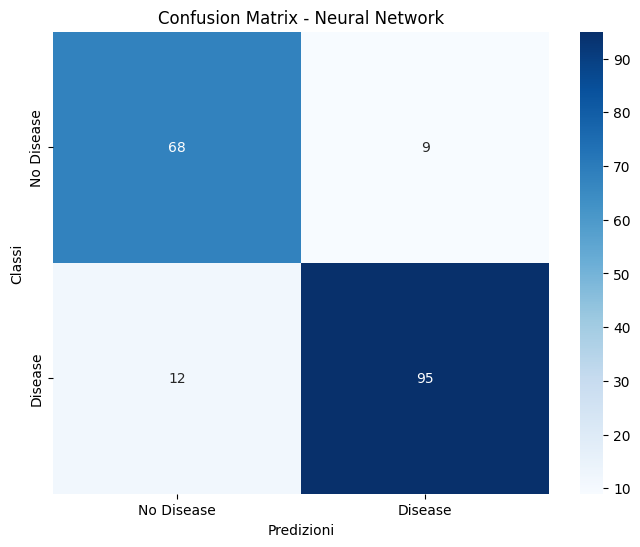

Numero di veri negativi: 68
Numero di falsi negativi: 12
Numero di veri positivi: 95
Numero di falsi positivi: 9


In [77]:
plot_confusion_matrix(y_test_tensor,  predictions_nn.numpy(), 'Neural Network')

In [78]:
"""
# Valutazione del modello di rete neurale
model_nn.eval()
with torch.no_grad():
    predictions_nn = (model_nn(X_test_tensor) > 0.5).float()
    accuracy_nn = accuracy_score(y_test_tensor, predictions_nn.numpy())
# Stampa previsioni del modello di rete neurale
print("Neural Network Predictions:")
print(predictions_nn)
"""

'\n# Valutazione del modello di rete neurale\nmodel_nn.eval()\nwith torch.no_grad():\n    predictions_nn = (model_nn(X_test_tensor) > 0.5).float()\n    accuracy_nn = accuracy_score(y_test_tensor, predictions_nn.numpy())\n# Stampa previsioni del modello di rete neurale\nprint("Neural Network Predictions:")\nprint(predictions_nn)\n'

<div  style="text-align:center;">
<h2>Costruzione del modello di Logistic Regression</h2>
</div>

La regressione logistica è un modello il cui obiettivo è prevedere la probabilità che un'istanza appartenga a una delle due classi. Utilizza una funzione logistica (o sigmoide) per mappare la somma ponderata delle features a una probabilità compresa tra 0 e 1.
La formula matematica della funzione logistica è la seguente:

<img style="text-align:center;" src="image/logisticregression.png" alt="Made by DALL-E">

<p>z è la somma ponderata delle features e dei loro coefficienti: z = w0 + w1x1 + w2x2 + ... + wnxn</p>
<p>w0 è l'intercetta (punto in cui la funzione logistica attraversa l'asse 
y quando tutte le variabili i sono zero)</p>
<p>w1, w2 ... wn sono i coefficienti</p>


Utilizza come funzione di perdita la Log-Loss:</p><img style="text-align:center;" src="image/logloss.png" alt="Made by DALL-E">

(m = istanze del training set, y = valori reali, ŷ = previsione del modello)

In [79]:
# Addestramento del modello di regressione logistica
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_transform, y_train)

LogisticRegression(max_iter=1000)

In [80]:
# Valutazione del modello di regressione logistica
predictions_lr = model_lr.predict(X_test_transform)
accuracy_lr = accuracy_score(y_test, predictions_lr)

print(f'Accuracy on test set (Logistic Regression): {accuracy_lr * 100:.2f}%')
print(classification_report(y_test, predictions_lr))

Accuracy on test set (Logistic Regression): 86.96%
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



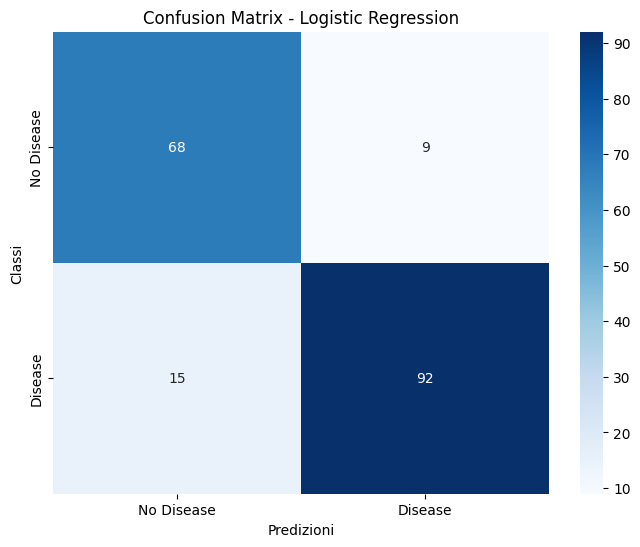

Numero di veri negativi: 68
Numero di falsi negativi: 15
Numero di veri positivi: 92
Numero di falsi positivi: 9


In [81]:
plot_confusion_matrix(y_test, predictions_lr, 'Logistic Regression')

<div  style="text-align:center;">
<h2>Costruzione del modello di Support Vector Machine</h2>
</div>

Support Vector Machines(SVM) cerca di trovare un iperpiano che separi i dati in due classi. L'iperpiano è scelto in modo che la distanza (margine) tra i punti più vicini delle due classi, chiamati support vectors, sia massimizzata. Le formule chiavi su cui si basa il modello sono: Equazione dell'iperpiano:
<img style="text-align:center;" src="image/iperpiano.png" alt="Made by DALL-E">
<p>(w=vettore dei pesi, x=vettore delle features, b=bias)</p>
Distanza di un punto x dall'iperpiano:
<img style="text-align:center;" src="image/margine.png" alt="Made by DALL-E">
(||w|| è la norma dei pesi)
<p>L'addestramento di un SVM si traduce in un problema di ottimizzazione:</p>
<img style="text-align:center;" src="image/optim_svm.png" alt="Made by DALL-E">
soggetto ai vincoli, per ogni punto di addestramento:
<img style="text-align:center;" src="image/vincoli_svm.png" alt="Made by DALL-E">
<p>Questi vincoli assicurano che ogni punto di addestramento sia correttamente classificato e si trovi sul lato corretto rispetto all'iperpiano.
L'obiettivo dell'SVM è quindi trovare un compromesso tra la massimizzazione del margine e la penalizzazione per punti di addestramento che si trovano all'interno del margine o sul lato sbagliato dell'iperpiano</p>

In [82]:
# Addestramento del modello Support Vector Machine (SVM)
model_svm = SVC(kernel='sigmoid') #kernel='poly', degree=3

param_grid = {'C': [0.1, 1, 10, 100]} #iperparametro di regolarizzazione
grid_search = GridSearchCV(model_svm, param_grid, cv=5)  #cv=5 indica che verrà utilizzata una cross-validazione a 5 fold(dataset addestrato e valutato 5 volte con diverse combinazioni di tarining set)
grid_search.fit(X_train_transform, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1}


In [83]:
# Valutazione del modello Support Vector Machine (SVM)
best_model_svm = grid_search.best_estimator_
predictions_best_svm = best_model_svm.predict(X_test_transform)
accuracy_svm = accuracy_score(y_test, predictions_best_svm)

print(f'Accuracy on test set (Support Vector Machine - Best Params): {accuracy_svm * 100:.2f}%')
print(classification_report(y_test, predictions_best_svm))


Accuracy on test set (Support Vector Machine - Best Params): 86.41%
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



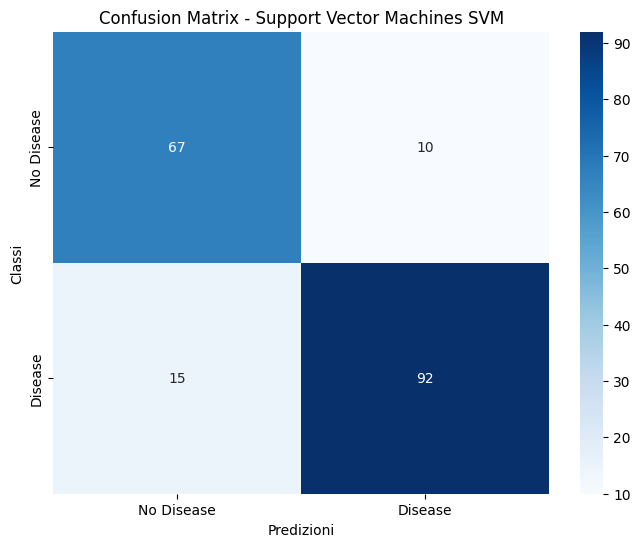

Numero di veri negativi: 67
Numero di falsi negativi: 15
Numero di veri positivi: 92
Numero di falsi positivi: 10


In [84]:
plot_confusion_matrix(y_test, predictions_best_svm, 'Support Vector Machines SVM')

<div  style="text-align:center;">
<h2>Costruzione del modello di K-Nearest Neighbors</h2>
</div>

L'algoritmo dei K-Nearest Neighbors (KNN) è un metodo di classificazione e regressione che si basa sulla vicinanza tra i dati. L'idea principale è che gli oggetti simili siano vicini nello spazio delle features. Il calcolo della distanza tra due punti A(x1, y1, ..., z1) e B(x2, y2, ..., z2) in un spazio n-dimensionale è dato dalla formula

<img style="text-align:center;" src="image/KNN.png" alt="Made by DALL-E">
Per un dato punto nel set di test, calcoliamo la distanza rispetto a tutti i punti nel set di addestramento e identifichiamo i k punti più vicin La classe del punto in analisi sarà quella più frequente tra i sui k vicini. Il numero di vicini più prossimi da considerare durante la classificazione è indicato dal parametro 'n_neighbors' e bisogna scegliere il parametro migliore. Un valore piccolo di n_neighbors (come 1 o 3) rende il modello più sensibile ai dettagli locali dei dati, ma può essere più suscettibile al rumore. Un valorù grande di n_neighbors (come 10 o 20) può rendere il modello più robusto rispetto al rumore, ma potrebbe perdere alcuni dettagli locali nei dati Utilizziamo, quindi, la cross-validazione per valutare le prestazioni del modello con diversi valori di n_neighbors e scegliere quello che fornisce le migliori prestazioni sul nostro set di dati.

In [85]:
#creazione del modello di K Nearest Neighbors (KNN):
knn = KNeighborsClassifier()

In [86]:
# Definizione dei parametri da testare
param_grid = {'n_neighbors': np.arange(1, 22, 2)} #consideriamo solo i k dispari

# Creazione dell'oggetto GridSearchCV per trovare il miglior parametro
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transform, y_train)

# Visualizza i risultati della ricerca
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['param_n_neighbors', 'mean_test_score']])

# Visualizza il miglior parametro
best_param = grid_search.best_params_['n_neighbors']
print(f'Miglior parametro n_neighbors: {best_param}')

   param_n_neighbors  mean_test_score
0                  1         0.801025
1                  3         0.843286
2                  5         0.841972
3                  7         0.852856
4                  9         0.848765
5                 11         0.851468
6                 13         0.854198
7                 15         0.856929
8                 17         0.862371
9                 19         0.859650
10                21         0.856919
Miglior parametro n_neighbors: 17


In [90]:
# Addestramento del modello con il miglior parametro
best_knn = KNeighborsClassifier(n_neighbors=best_param)
best_knn.fit(X_train_transform, y_train)

# Valutazione del modello
predictions_knn = best_knn.predict(X_test_transform)
accuracy_knn = accuracy_score(y_test, predictions_knn)

print(f'Accuracy on test set (KNN): {accuracy_knn * 100:.2f}%')
print(classification_report(y_test, predictions_knn))

Accuracy on test set (KNN): 85.33%
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



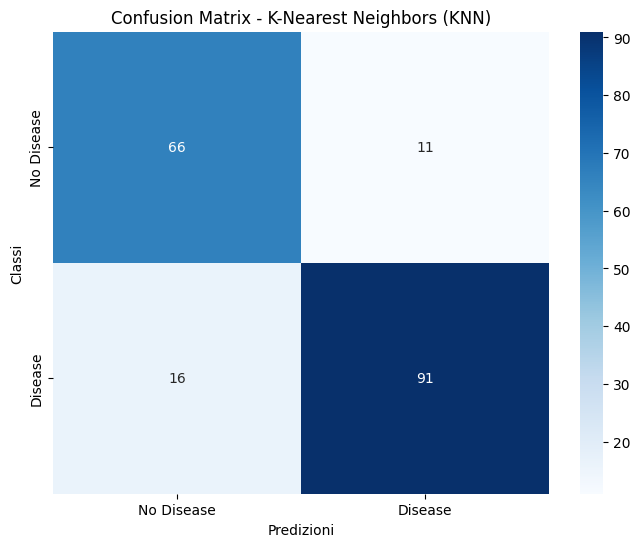

Numero di veri negativi: 66
Numero di falsi negativi: 16
Numero di veri positivi: 91
Numero di falsi positivi: 11


In [91]:
plot_confusion_matrix(y_test, predictions_knn, 'K-Nearest Neighbors (KNN)')

<div  style="text-align:center;">
<h2>Costruzione del modello di Random Forest</h2>
</div>

Random Forest è un modello, basato sull'ensamble learning (combinazione di più algoritmi) dove vengono combinati i risultati di più alberi decisionali.
I diversi alberi decisionali generati (random tree) vengono ognuno allenato su un campione casuale del dataset.
Ogni albero produce una previsione, e la previsione finale del Random Forest è ottenuta attraverso "un voto a maggioranza" delle previsioni degli alberi.
Per l'addestramento del modello effettuiamo una cros validation per trovare i migliori parametri e il miglior criterio di impurità tra indice di gini o entropia.

<img style="text-align:center;" src="image/gini.png" alt="Made by DALL-E">

<p>D è il nodo del dataset</p>
<p>c è il numero di classi</p>
<p>pi indica il numero di campioni nel dataset D appartenenti alla classe i</p>

<p>L'indice di Gini è un numero compreso tra 0 e 1. Un valore di 0 indica che il nodo è "puro", cioè tutti i campioni nel nodo appartengono alla stessa classe. Un valore di 1 indica che il nodo è "impuro", cioè i campioni sono distribuiti uniformemente tra le diverse classi.</p>

<p>L'algoritmo cerca di trovare le suddivisioni che minimizzano l'indice di Gini</p>

<p>L'entropia viene utilizzata per valutare la qualità di una divisione. L'entropia è massima quando i dati sono completamente disordinati, ovvero quando sono distribuiti uniformemente tra tutte le classi, invece, è minima quando l'insieme di dati è "puro", cioè tutti gli esempi appartengono alla stessa classe.</p>

<img style="text-align:center;" src="image/entropia.png" alt="Made by DALL-E">

L'obiettivo è ridurre l'entropia durante la creazione di nodi dell'albero, cercando di ottenere divisioni che separino il set di dati in sottoinsiemi più omogenei possibile.

p>

In [92]:
#Addestramento e valutazione del modelllo Random Forest:

#definizione griglia di iperparametri
param_grid = {
    'n_estimators': [50, 100, 200], #numero di alberi decisionali
    'max_depth': [None, 10, 20], #massima profondità di ciascun albero
    'min_samples_split': [2, 5, 10], #minimo di campioni richiesto per suddividere un nodo interno
    'min_samples_leaf': [1, 2, 4], #numero minimo di campioni richiesto per formare una foglia dell'albero
    'criterion': ['gini', 'entropy']
}

random_forest_model = RandomForestClassifier(random_state=42) 

#ricerca dei migliori parametri
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train_transform, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [93]:
#Valutazione del modello di Random Forest:
best_forest= grid_search.best_estimator_
predictions_best_forest = best_forest.predict(X_test_transform)
accuracy_forest = accuracy_score(y_test, predictions_best_forest)

print(f'Accuracy on test set (Random Forest - Best Params): {accuracy_forest * 100:.2f}%')
print(classification_report(y_test, predictions_best_forest))

Accuracy on test set (Random Forest - Best Params): 88.59%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



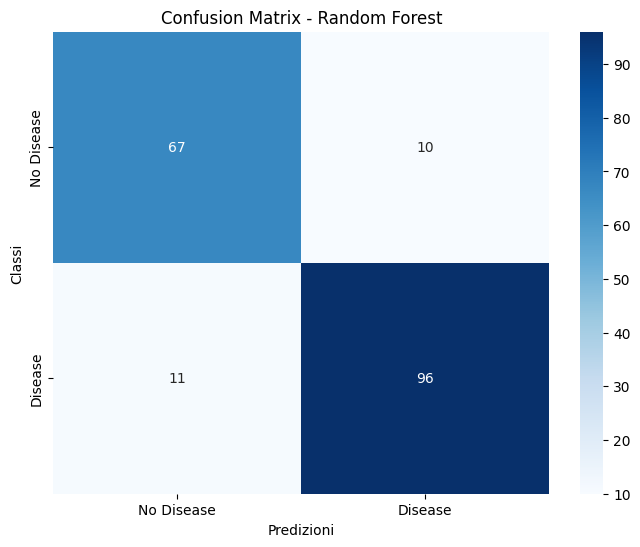

Numero di veri negativi: 67
Numero di falsi negativi: 11
Numero di veri positivi: 96
Numero di falsi positivi: 10


In [94]:
plot_confusion_matrix(y_test, predictions_best_forest, 'Random Forest')

<div  style="text-align:center;">
<h2>Confronto prestazioni dei modelli</h2>
</div>

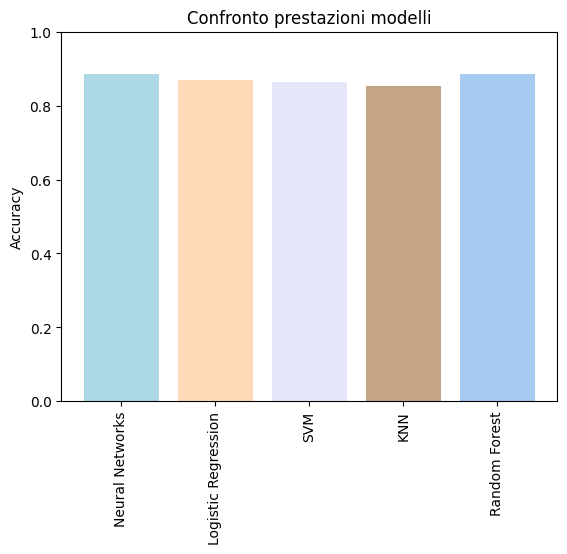

In [95]:
models = ['Neural Networks', 'Logistic Regression', 'SVM', 'KNN', 'Random Forest']
accuracys = [accuracy_nn, accuracy_lr, accuracy_svm, accuracy_knn, accuracy_forest]

plt.bar(models, accuracys, color=['#add8e6', '#ffdab9', '#e6e6fa', '#c4a484', '#a6caf0'])
plt.ylim(0, 1)  #imposto il limite y tra 0 e 1 per l'accuratezza percentuale
plt.ylabel('Accuracy')
plt.title('Confronto prestazioni modelli')
plt.xticks(rotation='vertical')
plt.show()


 

<div  style="text-align:center;">
<h2>Test dei vari modelli su nuovi dati</h2>
</div>


In [96]:
#Creaiamo un dataframe per testare i nostri modelli su nuovi dati:

new_data = pd.DataFrame({
    'Age': [27],
    'RestingBP': [120],
    'Cholesterol': [148],
    'FastingBS': [0],
    'MaxHR': [166],
    'Oldpeak': [0.90],
    'Sex_F': [0],
    'Sex_M' : [1],
    'ChestPainType_ASY': [1],
    'ChestPainType_ATA': [0],
    'ChestPainType_NAP': [0],
    'ChestPainType_TA': [0],
    'RestingECG_LVH': [0],
    'RestingECG_Normal': [1],
    'RestingECG_ST': [0],
    'ExerciseAngina_N': [1],
    'ExerciseAngina_Y': [0],
    'ST_Slope_Down': [0],
    'ST_Slope_Flat': [0],
    'ST_Slope_Up': [1]
})

In [97]:
new_data_transformed = scaler.transform(new_data)

In [98]:
def neural_model_valutation(new_data):
    new_data_tensor = torch.tensor(new_data_transformed, dtype=torch.float32)
    model_nn.eval()
    with torch.no_grad():
        new_predictions_nn = (model_nn(new_data_tensor) > 0.5).float()
    return'Neural Network Predictions for New Data:' + str(new_predictions_nn)

In [99]:
for m in [model_lr, best_model_svm, best_knn, best_forest]:
    new_prediction = (m.predict(new_data_transformed))
    print(f'{m} Predictions for New Data: {new_prediction}\n')
neural_model_valutation(new_data_transformed)

LogisticRegression(max_iter=1000) Predictions for New Data: [0]

SVC(C=0.1, kernel='sigmoid') Predictions for New Data: [0]

KNeighborsClassifier(n_neighbors=17) Predictions for New Data: [0]

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=42) Predictions for New Data: [0]



'Neural Network Predictions for New Data:tensor([[0.]])'

<div  style="text-align:center;">
<h2>CONCLUSIONI</h2>
</div>

<p>Nonostante le modeste dimensioni del data set, siamo riusciti a raggiungere un'accuracy tra l'85 e l'88.59%.</p>
<p>ulteriori iterazioni porterebbe ad un rischio overfitting del modello.</p>
<p>Riteniamo dunque che questo sia il punteggio migliore con i dati a nostra disposizione.</p>